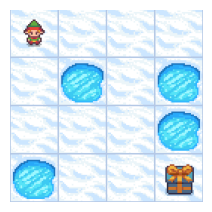

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time

env = gym.make("FrozenLake-v1", map_name="4x4",render_mode="rgb_array", is_slippery=True)
#env = gym.make("FrozenLake-v1", map_name="4x4",render_mode="rgb_array", is_slippery=False)

env.reset()     #puts the agent back in the initial state
plt.figure(figsize=(2.5,2.5)) 
plt.axis('off')
plt.imshow(env.render())

### Finding value of each state

In [2]:
def value_iteration(env):

    num_iterations = 100
    threshold = 1e-20
    gamma = 0.95

    #set up the value table
    value_table = np.zeros(env.observation_space.n)

    for i in range(num_iterations):

        updated_value_table = np.copy(value_table)

        for s in range(env.observation_space.n):
            q_value = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                for prob, s_, r, terminal in env.P[s][a]:
                    q_value[a] += prob*(r + gamma* updated_value_table[s_])
            value_table[s] = max(q_value)

        if np.sum(np.fabs(updated_value_table - value_table)) <= threshold:
            break

    return value_table

In [3]:
value_table = value_iteration(env)

[[0.18035745 0.15466    0.15340661 0.13247087]
 [0.20886331 0.         0.17639284 0.        ]
 [0.27037339 0.37459489 0.40363285 0.        ]
 [0.         0.50893908 0.72365223 0.        ]]


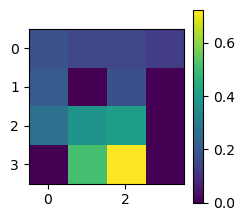

In [4]:
print(value_table.reshape(4,4))
plt.figure(figsize=(2.5,2.5))
plt.imshow(value_table.reshape(4,4))
plt.colorbar()

### Extracting optimal policy

In [5]:
def policy(value_table):

    gamma = 0.95

    policy = np.zeros(env.observation_space.n)

    for s in range(env.observation_space.n):
        q_value = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for prob, s_, r, terminal in env.P[s][a]:
                q_value[a] += prob*(r + gamma* value_table[s_])

        policy[s] = np.argmax(q_value)

    return policy

In [6]:
optimal_policy = policy(value_table)

[[0. 3. 0. 3.]
 [0. 0. 0. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


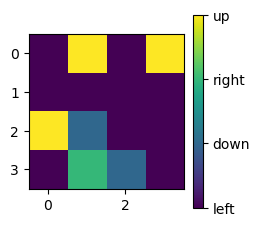

In [7]:
print(optimal_policy.reshape(4,4))
plt.figure(figsize=(2.5,2.5))
plt.imshow(optimal_policy.reshape(4,4))
cbar = plt.colorbar(ticks = [0,1,2,3])
cbar.set_ticklabels(["left","down","right", "up"])

In [8]:
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        print("state: ", s, ", action:", a, " dynamics: ", env.P[s][a])

state:  0 , action: 0  dynamics:  [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)]
state:  0 , action: 1  dynamics:  [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False)]
state:  0 , action: 2  dynamics:  [(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]
state:  0 , action: 3  dynamics:  [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False)]
state:  1 , action: 0  dynamics:  [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True)]
state:  1 , action: 1  dynamics:  [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False)]
state:  1 , action: 2  dynamics:  [(0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False), (0.333333333333333

In [9]:
env = gym.make("FrozenLake-v1", map_name="4x4",render_mode="human", is_slippery=True)
next_state, _ = env.reset()     #puts the agent back in the initial state
env.render()

for steps in range(50):

    action = optimal_policy[next_state].astype(int)
    (next_state, reward, done, info, prob) = env.step(action)
    time.sleep(0.25)
    if done:
        print("Number of steps taken: ", steps)
        break

Number of steps taken:  12


In [10]:
env.close()